In [2]:
#Kth smallest element in a BST
def kth_smallest_element(root, k):
    
    def inorder(root):
        res =[]
        if root:
            res+=inorder(root.left)
            res.append(root.value)
            res+=inorder(root.right)
        return res
        
    return inorder(root)[k-1]


## DFS



#https://leetcode.com/problems/binary-tree-paths/

class Solution:
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        res=[]
        def helper(node, path,res):
            print(path, node==None)
            if node == None:
                print(path)
                res.append(path.copy())
                return 
            if node.left:
                path.append(node.left.val)
                helper(node.left, path,res)        
                path.pop()
            if node.right:
                path.append(node.right.val)
                helper(node.right, path,res)        
                path.pop()
     
        helper(root, [root.val],res)
        return res
        
This is wrong because node == None kabhi aayega hi nahi as I am alredy checking node.left and node.right before passing them in  helper function. Correct solution as given below. 

**Observe return statement on line 11**


### Top Down DFS 


In [ ]:
#### Sum of All Paths in a Binary Tree
class Solution: 
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        if root == None:
            return []
        res=[]
        def helper(node, path,res):
            path.append(node.val)  
            if node.left == None and node.right ==None:
                res.append("->".join([str(p) for p in path]))
                #return 
            if node.left:
                helper(node.left, path,res)        
            if node.right:
                helper(node.right, path,res)        
            path.pop()
     
        helper(root, [],res)
        return res

In [ ]:
## 112. Path Sum

class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        
        res = [False]
        
        if root ==None:
            return False
        
        def helper(node, target):
            target-=node.val
        
            if node.left ==None and node.right == None: ##if node is leaf
                if target ==0:
                    res[0] = True
            if node.left:
                helper(node.left, target)
            if node.right:
                helper(node.right, target )
        helper(root, targetSum)
        return res[0]

class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:        
        res = [False]
        if root ==None:
            return False
        def helper(node, target):
            if node.left  ==None and node.right == None:
                if target ==0:
                    res[0] = True
            if node.left:
                helper(node.left, target-node.left.val)
            if node.right:
                helper(node.right, target-node.right.val )
        helper(root, targetSum)
        return res[0]
        
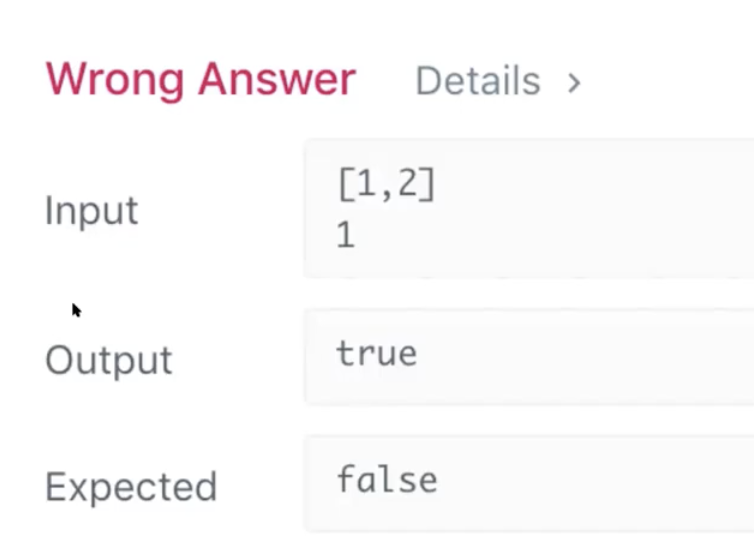

In [3]:
## 113. Path Sum II 
##  no return on line 13 as we pop on line 20 ##clean up the mess!!
class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> List[List[int]]:
        if root ==None:
            return []
        result =[]
        def dfs(node, path, targetSum):
            path.append(node.val)
            if node.left == None and node.right ==None:
                if sum(path)== targetSum:
                    result.append(path.copy() )
                    #return
            if node.left:
                dfs(node.left, path, targetSum)

            if node.right:
                dfs(node.right, path, targetSum)
            
            path.pop()
            
        dfs(root, [], targetSum)
        return result

In [ ]:
#298. Binary Tree Longest Consecutive Sequence
class Solution:
    def longestConsecutive(self, root: Optional[TreeNode]) -> int:
        if root ==None:
            return 0
        result = [1]
        def dfs(node, result, start, length):
            if node.val == start+1:
                    length+=1
                    result.append(length)
            else:
                length = 1
            
            if length > result[0]:
                result[0] = length
            
            if node.left:
                dfs(node.left, result, node.val, length)
            if node.right:
                dfs(node.right, result, node.val, length)
             
        dfs(root, result, root.val , 1)
        return result[0]

In [ ]:
#https://leetcode.com/problems/count-univalue-subtrees/
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def countUnivalSubtrees(self, root: Optional[TreeNode]) -> int:

    
        def helper(root):
            if root ==None:
                return 0 , True
            if  root.left == None and root.right ==None:
                return 1, True

            helper_left, l_unival = helper(root.left)
            helper_right, r_unival = helper(root.right)

            if root.left and root.right:
                if l_unival and r_unival and root.val == root.left.val and root.val==root.right.val :
                    return helper_left+helper_right+1, True

                else:
                    return helper_left+helper_right, False

            if root.left :
                if l_unival  and root.val == root.left.val  :
                    return helper_left+1, True

                else:
                    return helper_left, False
            if root.right:
                if r_unival  and root.val == root.right.val  :
                    return helper_right+1, True

                else:
                    return helper_right, False

        return  helper(root)[0]

In [23]:

def get_words_from_phone_number(phone_number):
    """
    Args:
     phone_number(str)
    Returns:
     list_str
    """
    # Write your code here
    
    D={ "2":"abc", "3":"def", "4":"ghi", "5":"jkl", "6":"mno", "7":"pqrs", "8":"tuv", "9":"wxyz"}
    result = []
    def helper (phone_number, i, slate, D):
        if i == len(phone_number) :           
            result.append(slate)
            return
        
        if phone_number[i] == "0" or phone_number[i] =="1":
            helper(phone_number, i+1, slate , D)
        else:
            for ch in D[phone_number[i]]:
                helper(phone_number, i+1, slate +ch , D)
        return 
        
        
    helper(phone_number, 0, "", D)
    if len(result) ==1 and result[0]=="":
        result= ["-1"]
    return result


phone_number ="1234567"
phone_number ="1010101"

get_words_from_phone_number(phone_number)

['-1']

In [26]:

def helper(nums, i, res, partial):
    if i==len(nums):
        res.append(partial.copy())
        return 

    for j in range(i,len(nums)):
        print(i, j)#,         partial[i], partial[j])
        partial[i], partial[j]=  partial[j], partial[i]
        helper(nums, i+1, res, partial)
        partial[i], partial[j]=  partial[j], partial[i]

def permute( nums):
    res = []
    helper(nums,0, res, nums)
    return res

permute([1,2,3])

0 0 1 1
1 1 2 2
2 2 3 3
1 2 2 3
2 2 2 2
0 1 1 2
1 1 1 1
2 2 3 3
1 2 1 3
2 2 1 1
0 2 1 3
1 1 2 2
2 2 1 1
1 2 2 1
2 2 2 2


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]]

In [1]:
max([1,2,3])

3